In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

Weather

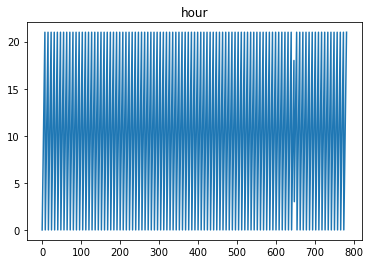

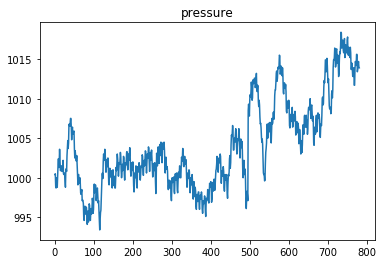

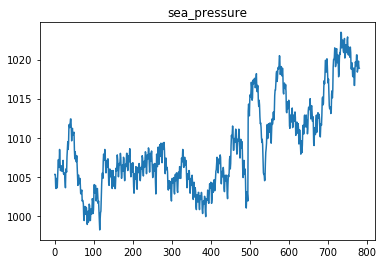

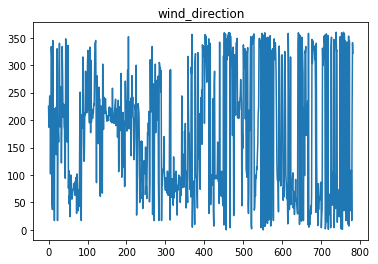

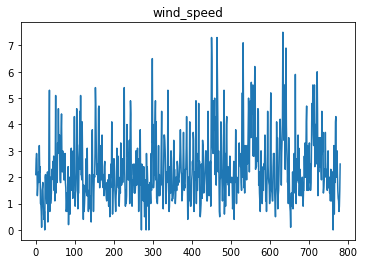

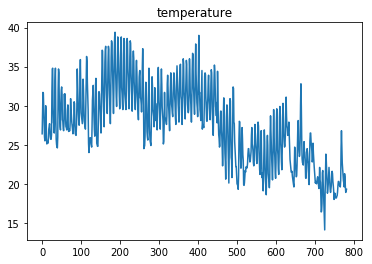

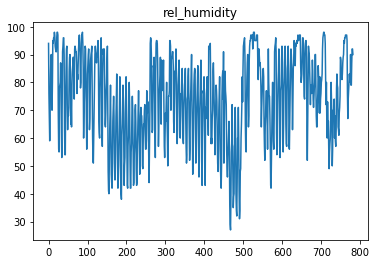

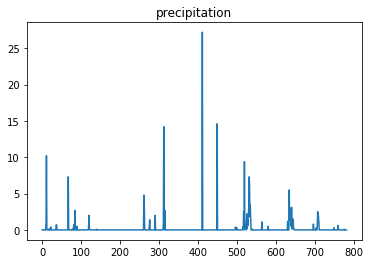

In [2]:
weather = pd.read_csv('dataSets/training/weather (table 7)_training.csv', index_col=0, header=0, engine='python')

a = weather['wind_direction']
a[a > 360] = a % 360

# print(dataset['wind_direction'])

for i in xrange(len(weather.columns.values)):
    plt.title(weather.columns.values[i])
    plt.plot(weather.values[:,i])
    plt.show()

Volume

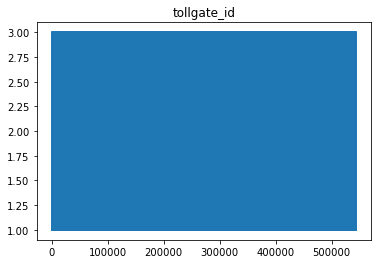

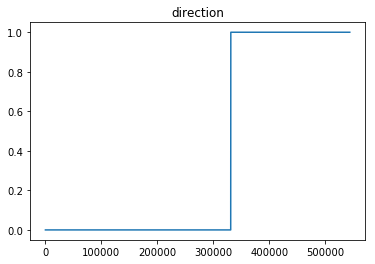

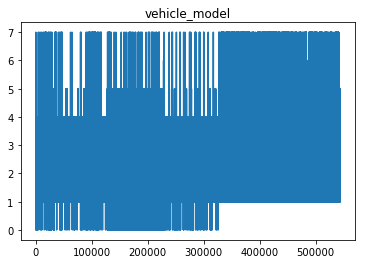

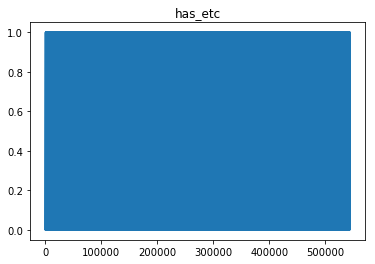

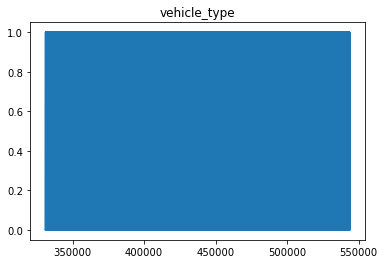

In [3]:
volume = pd.read_csv('dataSets/training/volume(table 6)_training.csv', index_col=0, header=0, engine='python')

# print(volume)

for i in xrange(len(volume.columns.values)):
    plt.title(volume.columns.values[i])
    plt.plot(volume.values[:,i])
    plt.show()

Trajectories

(5965,)
(15291,)
(15291,)


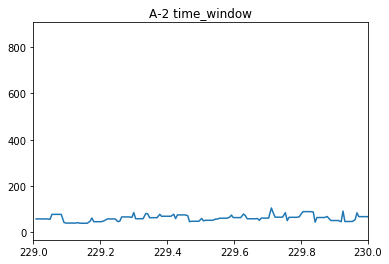

In [4]:
# Data preparations

from datetime import datetime
import numpy as np
from itertools import izip

volume = pd.read_csv('scripts/training_20min_avg_travel_time.csv', index_col=[0,1], header=0, engine='python')

routes = [('A',2),('A',3),('B',1),('B',3),('C',1),('C',3)]

# print(((volume.loc['B']).loc[3]))


for intersection, tollgate in routes:
    ax = plt.subplot(111)
    ax.set_xlim([229,230]) 
    plt.title(intersection + "-" + str(tollgate) + " " + volume.columns.values[0])
    
    windows = ((volume.loc[intersection]).loc[tollgate].values[:,0])
    periods = np.array(((volume.loc[intersection]).loc[tollgate]).values[:,1])
    
    periods.shape
    
    print periods.shape
    x = []
    y = []
    window0 = 0
    for window, period in izip(windows, periods):
        window = window.split(',')[0].replace('[', '')
        window = datetime.strptime(window, "%Y-%m-%d %H:%M:%S")
        window = window.month*30 + window.day + window.hour/24. + (window.minute+10)/3600.
        if window0 == 0:
            window0 = window
        for i in xrange( int((window - window0) * 180) - 1):
            x.append(x[-1]+1./180.)
            y.append(y[-1])
        else:
            x.append(window)
            y.append(period)
            window0 = window
            
    x = np.asarray(x)
    y = np.asarray(y)

    print x.shape
    print y.shape    
        
    plt.plot(x,y)
    plt.show()
    
    break


In [5]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [6]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return numpy.array(dataX), numpy.array(dataY)

In [7]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataset = np.asarray(y)
dataset = dataset.reshape(-1,1)
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]


In [ ]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))


(12228, 3, 1)
(3055, 3, 1)
(12228, 1)
(3055, 1)
(12228, 3, 1)
(3055, 3, 1)
[[[ 0.05556726]
  [ 0.05556726]
  [ 0.05556726]]

 [[ 0.05556726]
  [ 0.05556726]
  [ 0.05556726]]

 [[ 0.05556726]
  [ 0.05556726]
  [ 0.05556726]]

 ..., 
 [[ 0.06867153]
  [ 0.06867153]
  [ 0.06867153]]

 [[ 0.06867153]
  [ 0.06867153]
  [ 0.06867153]]

 [[ 0.06867153]
  [ 0.06867153]
  [ 0.06429173]]]
[[ 0.05556726]
 [ 0.05556726]
 [ 0.05556726]
 ..., 
 [ 0.06867153]
 [ 0.06429173]
 [ 0.03957045]]


0
Epoch 1/1
97s - loss: 0.0012
Train Score: 27.89 RMSE
Test Score: 18.53 RMSE


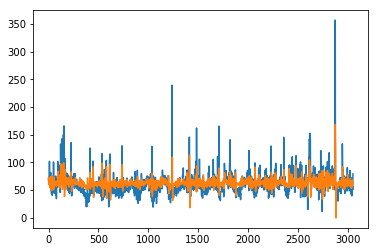

1
Epoch 1/1
98s - loss: 9.6074e-04
Train Score: 24.74 RMSE
Test Score: 16.29 RMSE


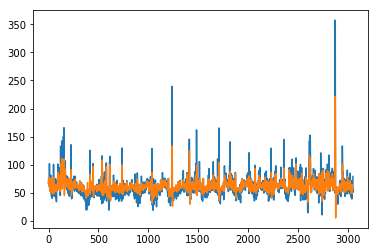

2
Epoch 1/1
94s - loss: 8.0180e-04
Train Score: 23.50 RMSE
Test Score: 15.43 RMSE


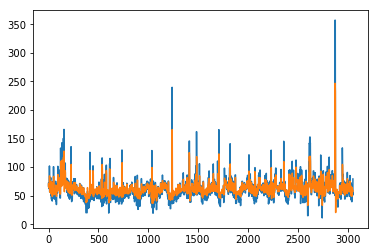

3
Epoch 1/1
107s - loss: 7.6876e-04
Train Score: 23.29 RMSE
Test Score: 15.28 RMSE


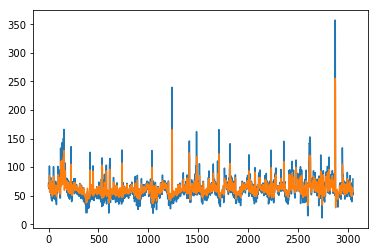

4
Epoch 1/1
96s - loss: 7.5772e-04
Train Score: 23.18 RMSE
Test Score: 15.22 RMSE


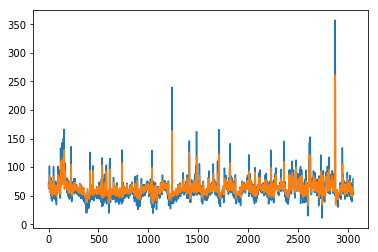

5
Epoch 1/1
90s - loss: 7.5069e-04
Train Score: 23.11 RMSE
Test Score: 15.19 RMSE


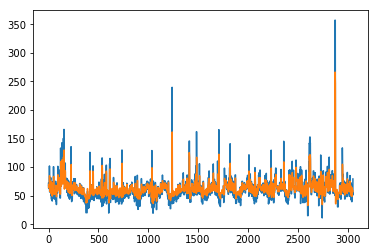

6
Epoch 1/1
89s - loss: 7.4603e-04
Train Score: 23.07 RMSE
Test Score: 15.18 RMSE


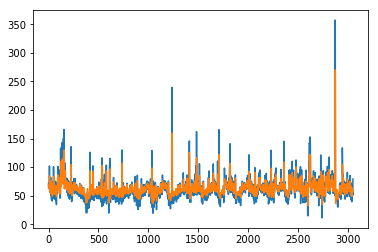

7
Epoch 1/1
88s - loss: 7.4284e-04
Train Score: 23.04 RMSE
Test Score: 15.18 RMSE


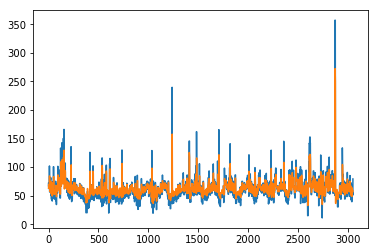

8
Epoch 1/1
95s - loss: 7.4057e-04
Train Score: 23.02 RMSE
Test Score: 15.18 RMSE


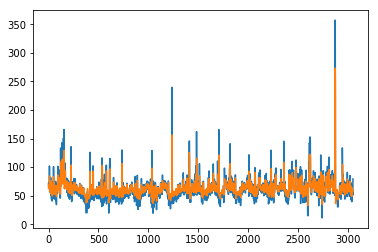

9
Epoch 1/1
96s - loss: 7.3897e-04
Train Score: 23.00 RMSE
Test Score: 15.19 RMSE


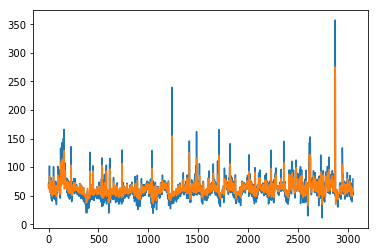

10
Epoch 1/1
99s - loss: 7.3835e-04
Train Score: 22.99 RMSE
Test Score: 15.20 RMSE


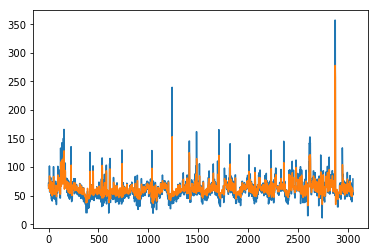

11
Epoch 1/1
102s - loss: 7.3796e-04
Train Score: 22.99 RMSE
Test Score: 15.20 RMSE


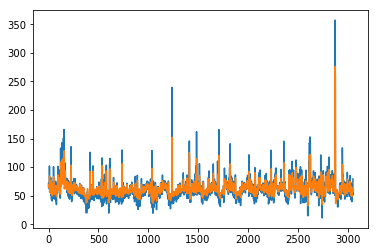

12
Epoch 1/1
110s - loss: 7.3838e-04
Train Score: 23.01 RMSE
Test Score: 15.19 RMSE


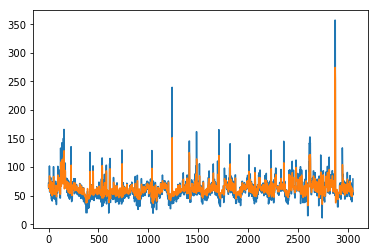

13
Epoch 1/1
106s - loss: 7.3871e-04
Train Score: 23.03 RMSE
Test Score: 15.17 RMSE


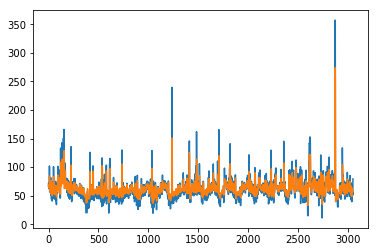

14
Epoch 1/1
92s - loss: 7.3972e-04
Train Score: 23.02 RMSE
Test Score: 15.17 RMSE


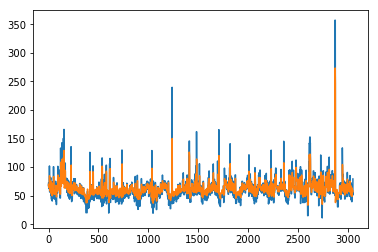

15
Epoch 1/1
89s - loss: 7.3996e-04
Train Score: 23.01 RMSE
Test Score: 15.20 RMSE


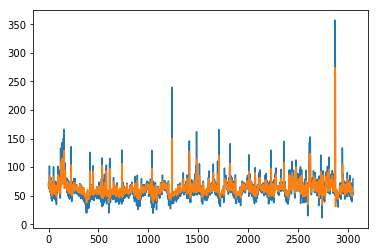

16
Epoch 1/1
92s - loss: 7.4208e-04
Train Score: 22.95 RMSE
Test Score: 15.36 RMSE


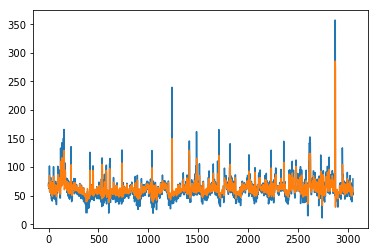

17
Epoch 1/1
95s - loss: 7.3472e-04
Train Score: 23.18 RMSE
Test Score: 15.33 RMSE


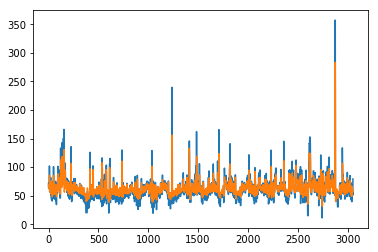

18
Epoch 1/1
93s - loss: 7.4557e-04
Train Score: 23.14 RMSE
Test Score: 15.26 RMSE


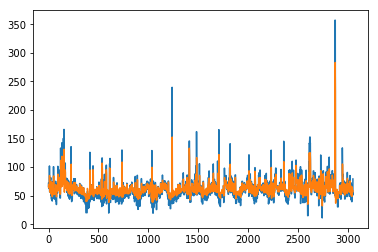

19
Epoch 1/1
98s - loss: 7.3889e-04
Train Score: 23.07 RMSE
Test Score: 15.12 RMSE


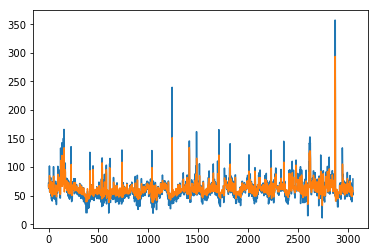

20
Epoch 1/1
96s - loss: 7.4042e-04
Train Score: 22.94 RMSE
Test Score: 15.03 RMSE


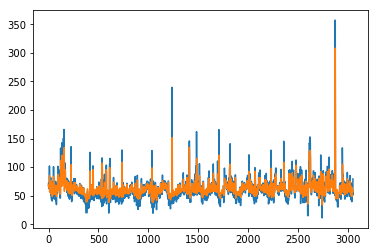

21
Epoch 1/1
94s - loss: 7.3620e-04
Train Score: 22.68 RMSE
Test Score: 14.93 RMSE


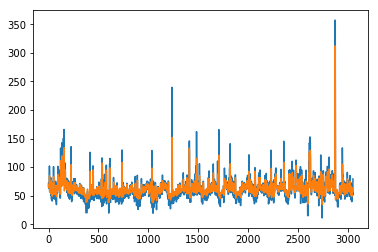

22
Epoch 1/1
94s - loss: 7.2576e-04
Train Score: 22.64 RMSE
Test Score: 14.93 RMSE


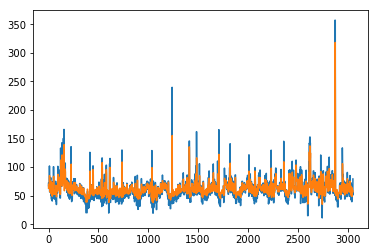

23
Epoch 1/1
95s - loss: 7.3277e-04
Train Score: 22.63 RMSE
Test Score: 14.98 RMSE


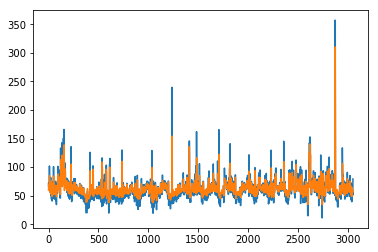

24
Epoch 1/1
89s - loss: 7.3110e-04
Train Score: 22.78 RMSE
Test Score: 15.04 RMSE


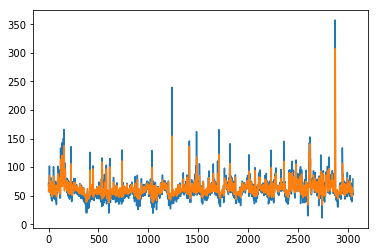

25
Epoch 1/1
89s - loss: 7.3351e-04
Train Score: 22.74 RMSE
Test Score: 14.99 RMSE


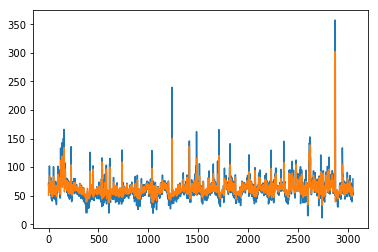

26
Epoch 1/1


In [ ]:
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(500):
    print i
    model.fit(trainX, trainY, nb_epoch=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()
    
    # make predictions
    trainPredict = model.predict(trainX, batch_size=batch_size)
    model.reset_states()
    testPredict = model.predict(testX, batch_size=batch_size)
    
    #print(trainPredict.shape)
    #print(testPredict.shape)
    
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY_print = scaler.inverse_transform(trainY)
    testPredict = scaler.inverse_transform(testPredict)
    testY_print = scaler.inverse_transform(testY)
    trainScore = math.sqrt(mean_squared_error(trainY_print, trainPredict[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY_print, testPredict[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))
    
    plt.plot(testY_print)
    plt.plot(testPredict[:,0])
    plt.show()
    
    

model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

499
Epoch 1/1
41s - loss: 7.4041e-04
Train Score: 22.83 RMSE
Test Score: 15.15 RMSE

----------------------

In [ ]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

In [ ]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
# trainPredictPlot = numpy.empty_like(dataset)
# trainPredictPlot[:] = numpy.nan
# trainPredictPlot[look_back:len(trainPredict)+look_back] = trainPredict
# # shift test predictions for plotting
# testPredictPlot = numpy.empty_like(dataset)
# testPredictPlot[:] = numpy.nan
# testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1] = testPredict
# plot baseline and predictions
# plt.plot(scaler.inverse_transform(dataset))
# plt.plot(trainPredict)
# plt.plot(testPredict)
# plt.show()

print trainY
print trainPredict

plt.plot(testY)
plt.plot(testPredict[:,0])
plt.show()